# Programación lineal, algoritmo símplex

## Introducción
El método de programación lineal ha sido un método sumamente utilizado para matemática avanzada y ciencias avanzadas,
brindando solución a problemas de máximos y mínmos, ya que este algoritmo nos presenta distintos métodos de solución, 
siendo el más utilizado el método simplex, pues nos ayuda a encontrar la solución de forma rápida y acertada, por tanto en este documento
demostraremos de forma detallada la realización del mismo, como se implementa, las funcionalidades que este puede presentar, y un ejemplo de como utilizarlo.

## Resultados teóricos del algoritmo simplex

### Utilidad
El algoritmo simplex es el método clásico para resolver programas lineales.

### Funcionamiento

#### Prerequisitos
* El problema tiene que introducirse en la forma estándar para que el programa funcione
* Las soluciones de las inecueciones tienen que ser positivas 

#### Pasos
1. Para utilizar el algoritmo simplex, debemos convertir el programa lineal a forma floja (slack form)
2. Nos enfocamos en la solución básica: establecemos todas las variables (no básicas) en el lado derecho en 0 y luego calculamos los valores de las variables (básicas) en el lado izquierdo
3. Para cambiar la solución básica, seleccionamos una variable no básica $x_{e}$ cuyo coeficiente en la función objetivo es positiva, y lo incrementamos tanto las ecuaciones permitan, posteriormente, la variable $x_{e}$ pasa a ser una variable básica y otra variable tipo $x_{l}$ deja de ser básica, así que aplicaremos esa lógica a nuestro ejemplo, utilizaremos $x_{1}$ para empezar.
4. Repetir el paso 3, hasta que la solución objetiva tenga todos sus coeficientes negativos, lo que significaría que la solución está optimizada

### Demostración de convergencia del algoritmo
Empezamos con la forma canónica del problema lineal del cual partiremos

\begin{array}{l}
\text {(I): Minimizar z con: } \\
x_{1} + \quad + \quad ··· \quad \quad+ a_{1,m+1} x_{m+1} + ··· + a_{1,n} x_{n} = b_{1}\\
\quad \quad x_{2} + \quad ···\quad \quad + a_{1,m+1} x_{m+1} + ··· + a_{2,n} x_{n} = b_{2}\\
\quad \quad \quad ·\\
\quad \quad \quad \quad ·\\
\quad \quad \quad \quad \quad ·\\
\quad \quad \quad \quad \quad \quad \quad x_{m} + a_{m,m+1} x_{m+1} + ··· + a_{m,n} x_{n} = b_{m}\\
\quad \quad \quad \quad \quad \quad \quad \quad + c_{m+1} x_{m+1} + ··· + c_{n} x_{n} = z_{0} + z\\
 x_{1}, \quad x_{2}, \quad··· x_{m}, \quad x_{m+1}, \quad ··· \quad x_{n} \geq 0
\end{array}

si (I) es no degenerado, eso significa que se ha probado la convergencia, así que hay que considerar el caso degenerativo y construir una prueba en base aeso.

Notación y terminología: 
* Se utilizará $b*_{i}$, $a*_{ij}$ para denotar coeficientes que han pasado por el paso del $\textbf{pivote}$.
* $\textbf{Degenerado o degeneración}$: Este término se utiliza cuando una variable básica toma el valor de 0.

##### Lema A
(i) Si $b_{i}$ para toda i, entonces después de hacer la operación de pivote, todavía tendremos $b*_{i} = 0$ para todo i.$\\$
(ii) Si al menos uno de las $b_{i} \neq 0$, entonces al menos un $b*_{i} \neq 0$

##### Lema B
Asuma que al menos uno de las $b_{i} \neq 0$ y hay una secuencia de pasos de pivote que completa la solución. Entonces, si reemplazamos todas las $b_{i} = 0$, la misma secuencia puede ser usada para completar este nuevo problema.

##### Teorema C (convergencia)
Para el programa lineal en (I), existe una secuencia de pasos de pivote que completa la solución. Esto significa, que alcanzaremos ya sea el teorema O o el teorema U. Que establecen:

Teorema O: Si todo $c*_{i} \geq 0$ entonces $z_{min} = -z*_{0}$.

Teorema U: Para algún $c*_{k} < 0 $, entonces tenemos $a*_{ik} \leq 0$, para todo i, entonces $z_{min}$ no tiene límite inferior (no tiene mínimo).

##### Probando el teorema C
... por inducción en m: # de eciaciones con restricciones.

$\textbf{Caso base}$: m = 1, solo una ecuación.

\begin{array}{l}
x_{1} + a_{1,m+1} x_{m+1} + ··· + a_{1,n} x_{n} = b_{1}\\
\quad \quad c_{m+1} x_{m+1} + ··· + c_{n} x_{n} = z_{0} + z\\
\end{array}

(a): Si $b_{1} \neq 0:$ El lema A implica $b_{1} \neq 0$, no degenerado.$\\$
(b): Si $b*_{1} = 0$: El lema B dice, que se toman los mismos pasos que en (a) para resolverlo

$\textbf{Paso inductivo}$: Asumimos que la declaración se mantiene para el programa lineal con m-1 o menos ecuaciones. necesitamos probar la declaración para el programa lineal con m ecuaciones.

$\textbf(A)$. Asumir para m ecuaciones, que al menos un $b*_{i} \neq 0$. $\\$
(i). Aplicar simplex, hasta que ya podamos aplicar pivote para reducir z, es decir: Cuando el problema se haya resuelto. O, debido a degeneración (algunos $b_{i}$ son 0).

(ii). Sea r = #$b_{i}$ con todos los $b_{i}$ que son 0. El lema A dice que r<m. 
Reordenar las ecuaciones y variables s.t. $b_{i} = 0$ para $ 1 \leq i \leq r$ y $b_{i} > 0$ para $i>r$.

\begin{array}{l}
\text {PL (II)} \\
x_{1}  \quad  \quad \quad \quad+ a_{1,m+1} x_{m+1} + ··· + a_{1,n} x_{n} = 0 \quad (\ast) \\
\quad \quad x_{r} \quad \quad \quad + a_{r,m+1} x_{m+1} + ··· + a_{r,n} x_{n} = 0 \quad (\ast \ast) \\
\quad \quad \quad \quad x_{r+1} + a_{r+1,m+1} x_{m+1} + ··· + a_{r+1,n} x_{n} = b_{r+1} > 0\\
\quad \quad \quad \quad \quad x_{m} + a_{m,m+1} x_{m+1} + ··· + a_{m,n} x_{n} = b_{m} > 0\\
\quad \quad \quad \quad \quad \quad c_{m+1} x_{m+1} + ··· + c_{n} x_{n} = z_{0} + z \quad \quad (O) \\
\end{array}

(iii) considere ($*$)-($**$): en la forma canónica con BV ($x_{1},···,x_{r}$), y ($x_{r+1},···,x_{n}$) no aparece en ($*$)-($**$).

Por supuesto de inducción, el Programa lineal ($*$)-($**$) + (O) puede ser resuelto por cierta cantidad de pasos pivote.

(iv) Aplicamos los mismos pasos de pivotes a LP(II). El sistema resultado es canónico y $z_{0}$ no se cambia

Ahora tenemos 2 posibles casos:
* Todos los $c*_{j} \geq 0$: aplicar el teorema O, se ha alcanzado el mínimo.
* Para algún $c*_{j} < 0$ y $a*_{ik} \leq 0$ para $1 \leq i \leq r$.

(a) Tenemos que $a*_{ik}$ para $i>r$. aplicando el teorema U, y podemos concluir que el mínimo no tiene límite.

(b) Tenemos que $a*_{ik}$ para algún $i>r$. Entonces, hacemos el paso pivote. entonces $b_{i}>0$ para i>r, reduciremos estrictamente $-z_{0}$ después del paso pivote.

##### Uniendolo todo:
Siguiendo los pasos (i), (ii), (iii) y (iv), tenemos una secuencia de pivote, que: o completa el problema, o reduce estrictamente $-z_{0}$.

Repetir (i)-(iv) multiples veces. En una cantidad finita de veces, el método Simplex será completado.

$\textbf(B)$ finalmente, si todos los $b_{i}$ son 0, por el lema B, la misma secuencia que en el paso (A) completará el procedimiento.

### Eficiencia

El algoritmo simplex es de eficiencia tipo exponencial, lo que significa que con los inputs adecuados, este algoritmo suele ser bastante rápido, incluso podría ser más rápido que algunos algoritmos de tipo polinomial

### Ventajas
* Fuciona para modelo de n variables
* Mediante el método de simplex regresa la respuesta más óptima.
* Ubica todos los puntos extremos
* Es un método rápido

### Desventajas
* Ejecuta el procedimiento por pasos, por lo que una linea mala significa el resto del proceso malo (Desventaja de aplicacion)
* No acepta funciones que tengan solución en el origen (al realizar el método de simplex).
* Se complica el cálculo a la inversa o multiplicación de matrices.
* Cae en ciclo si no se establece bien las restricciones, volviendo el programa ineficaz (simplex).

### Ejemplo teórico
Considere el siguiente programa lineal en forma estándar

\begin{array}{l}
\text { maximizar: } \\
\quad3 x_{1}+x_{2}+2 x_{3}\\
\text { Condiciones : }\\
\quad x_{1}+x_{2}+3 x_{3} \leq 30 \\
\quad 2 x_{1}+2 x_{2}+5 x_{3} \leq 24 \\
\quad 4 x_{1}+x_{2}+2 x_{3} \leq 36 \\
\quad x_{1}, x_{2}, x_{3} \geq 0
\end{array}

1. Para utilizar el algoritmo simplex, debemos convertir el programa lineal a forma floja (slack form)

\begin{array}{l}
z= 3 x_{1}+x_{2}+2 x_{3} \\
x_{4}=30-x_{1}-x_{2}-3 x_{3} \\
x_{5}=24-2 x_{1}-2 x_{2}-5 x_{3} \\
x_{6}=36-4 x_{1}-x_{2}-2 x_{3} \\
x_{1}, x_{2}, x_{3} \geq 0
\end{array}

El valor de las variables $x_{1}$, $x_{2}$, y $x_{3}$ define valores para $x_{4}$, $x_{5}$ y $x_{6}$; por lo tanto, tenemos un número infinito de soluciones para este sistema de ecuaciones. Una solucion es factible si todas las variables ($x_{1}$, $x_{2}$, ... , $x_{6}$) no son negativas.

2. Nos enfocamos en la solución básica: establecemos todas las variables (no básicas) en el lado derecho en 0 y luego calculamos los valores de las variables (básicas) en el lado izquierdo. Dejando los siguientes valores para estas ecuaciones:

\begin{array}{l}
z= 0 \\
x_{4}=30 \\
x_{5}=24 \\
x_{6}=36 \\
\end{array}

observamos que los valores ($\bar{x_{1}}, \bar{x_{2}},...,\bar{x_{6}}$) = (0,0,0,30,24,36) y tiene un valor objetivo de $z=(3·0)+(1·0)+(2·0)=0$

Observe que la solución básica propone $\bar{x_{i}}=b_{i}$ por cada $i \in B$, por cada iteración del algoritmo simplex, se reescriben las ecuaciones y el objetivo de la función, es de poner variables distintas a la derecha y así, cambiamos la solución básica que es asociada con el problema reescrito (cabe destacar que esto no cambia en ninguna forma el problema original).

Si una solución básica es factible, la llamaremos $\textbf{solución básica factible}$, lo que es normalmente el caso, aunque habrán algunas ocasiones, en la que la solución básica no es factible

3. Para cambiar la solución básica, seleccionamos una variable no básica $x_{e}$ cuyo coeficiente en la función objetivo es positiva, y lo incrementamos tanto las ecuaciones permitan, posteriormente, la variable $x_{e}$ pasa a ser una variable básica y otra variable tipo $x_{l}$ deja de ser básica, así que aplicaremos esa lógica a nuestro ejemplo, utilizaremos $x_{1}$ para empezar.

A medida que incrementamos $x_{1}$ los valores de $x_{4}, x_{5}, x_{6}$ decrecen, no podemos permitir que estas variables se conviertan en negativas, por lo que progamos que valor máximo puede tomar $x_{1}$ en las siguientes ecuaciones (asumiendo que $x_{2} y x_{3}$ sean 0 por las reglas establecidas anteriormente):

\begin{array}{l}
x_{4}=30-x_{1} \\
x_{5}=24-2 x_{1} \\
x_{6}=36-4 x_{1} \\
\end{array}

Podemos observar, que en $x_{4}$ el valor de $x_{1}$ no puede ser mayor a 30, así como en $x_{5}$ y en $x_{6}$ el valor de $x_{1}$ no puede ser mayor a 12 y 9 respectivamente, por lo que nos decantamos por el mayor valor que no contradiga ninguna de las reglas anteriormente establecidas, el cuál sería 9, por lo que en la tercera ecuación, cambiamos los roles de $x_{1}$ y $x_{6}$ y resolvemos la ecuación para $x_{1}$, para obtener:
\begin{array}{l}
x_{1}=9-\frac{x_{2}}{4}-\frac{x_{3}}{2}-\frac{x_{6}}{4} \\
\end{array}

Para reescribir las otras ecuaciones con $x_{6}$ a la derecha, simplemente sustituimos $x_{1}$ con la ecuación obtenida anteriormente y desarrollamos, lo que nos deja con las siguientes ecuaciones:

\begin{array}{l}
z= 27+ \frac{x_{2}}{4} + \frac{x_{3}}{2} - \frac{3 x_{6}}{4}\\
x_{1}= 9 -  \frac{x_{2}}{4} - \frac{x_{3}}{2} - \frac{x_{6}}{4} \\
x_{4}= 21 - \frac{3x_{2}}{4} - \frac{5x_{3}}{2} + \frac{x_{6}}{4} \\
x_{5}= 6 -  \frac{3x_{2}}{2} - 4x_{3} + \frac{x_{6}}{2}\\
\end{array}

A este proceso que acabamos de hacer le llamamos $\textbf{pivote}$ a donde $x_{1}$ es la variable entrante y $x_{6}$ es la variable saliente

4. Una vez hemos realizado nuestro primer $\textbf{pivote}$, tenemos que utilizar las otras 2 variables restantes para pivotar, primero escogeremos $x_{3}$, luego $x_{2}$, por lo que aplicamos el paso 3.

\begin{array}{l}
x_{1}= 9  - \frac{x_{3}}{2} \\
x_{4}= 21 - \frac{5x_{3}}{2} \\
x_{5}= 6 - 4x_{3}\\
\end{array}

Resolver estas ecuaciones nos da un valor de 18 en $x_{1}$, 42/5 en $x_{4}$ y 3/2 en $x_{5}$. Por lo que sustituimos $x_{3}$ por $x_{5}$ en la tercera ecuación, lo que nos da:

$x_{3} = \frac{3}{2} - \frac{3 x_{2}}{8} - \frac{x_{5}}{4} + \frac{x_{6}}{8}$

Sustituimos en el sistema de ecuaciones:

\begin{array}{l}
z= \frac{111}{4} + \frac{x_{2}}{16} - \frac{x_{5}}{8} - \frac{11x_{6}}{16}\\
x_{1}= \frac{33}{4} - \frac{x_{2}}{16} + \frac{x_{5}}{8} - \frac{5x_{6}}{16}\\
x_{3}= \frac{3}{2} - \frac{3x_{2}}{8} - \frac{x_{5}}{4} + \frac{x_{6}}{8}\\
x_{4}= \frac{69}{4} + \frac{3x_{2}}{16} + \frac{x_{5}}{8} - \frac{x_{6}}{16}\\
\end{array}

este sistema tiene la solución básica de (33/4,0,3/2,69/4,0,0), con un valor objetivo de 111/4, ahora, la única manera de aumentar el valor objetivo es de aumentar $x_{2}$. las 3 ecuaciones dan valores máximos de 132, 4 y $\infty$ respectivamente (obtuvimos un valor de infinito, debido a que a medida aumenta $x_{2}$, el valor de $x_{4}$ también aumenta, lo que significa que no hay valor que cumpla la restricción de cuanto podemos aumentar $x_{2}$.) Aumentamos el valor de $x_{2}$ a 4. Sustituimos en las ecuaciones...

\begin{array}{l}
z= 28 - \frac{x_{3}}{6} - \frac{x_{5}}{6} - \frac{2 x_{6}}{3}\\
x_{1}= 8 +  \frac{x_{3}}{6} + \frac{x_{5}}{6} - \frac{x_{6}}{3} \\
x_{2}= 4 - \frac{8x_{3}}{3} - \frac{2x_{5}}{3} + \frac{x_{6}}{3} \\
x_{4}= 18 -  \frac{x_{3}}{2} + \frac{x_{5}}{2}\\
\end{array}

En este punto, todos los coeficientes de la función objetiva son negativos, esta situación solo ocurre cuando hemos reescrito el programa lineal de tal forma que la solución básica es la solución más optimo.

5. Ya que sabemos que la función objetiva es produce una solución básica óptima, con la solución (8,4,0,18,0,0) con el valor objetivo de 28, que se obtiene haciendo el reemplazo en el programa lineal original, utilizando las variables que aparecían en este programa lineal original.

$z = 3 x_{1}+x_{2}+2 x_{3}$

$z = (3·8)+(1·4)+(2·0)$

$z = 28$

$x_{1} = 8$

$x_{2} = 4$

$x_{3} = 0$

Lo cuál es nuestra respuesta final

## Experimentos numéricos hechos en Python del algoritmo simplex.

In [18]:
def simplex(A, b, c):
    try:
        N, B, A, b, c, v = initializeSimplex(A, b, c)
        delta = []
        for i in range(len(B)):
            delta.append(0)
        for j in range(len(N)):
            if c[j] > 0:
                e = j
                for i in range(len(B)):
                    if A[i][e] > 0:
                        delta[i] = b[i] / A[i][e]
                    else:
                        delta[i] = float('inf')
                l = delta.index(min(delta))
                if delta[l] == float('inf'):
                    return print("unbounded")
                else:
                    N, B, A, b, c, v = pivot(N, B, A, b, c, v, l, e)

        for i in range(len(N)+len(B)):
            if i + 1 in B:
                index = B.index(i + 1)
                print("x{0}: {1}".format(i+1, b[index]))
            else:
                print("x{0}: {1}".format(i+1, 0))
        print("z: {0}".format(v))
    except ValueError:
        print("El algoritmo no se puede ejecutar con esas condiciones")
    return


def initializeSimplex(A, b, c):
    k = b.index(min(b))
    if b[k] >= 0:  # Is the initial basic solution feasible?
        return [x+1 for x in range(len(c))], [len(c)+x+1 for x in range(len(b))], A, b, c, 0
    else:
        for i in range(len(b)):
            A[i].append(0)
        return "infeasible"


def pivot(N, B, A, b, c, v, l, e):
    pivotA = [[0 for i in range(len(c))] for j in range(len(b))]
    pivotb = [0 for i in range(len(b))]
    pivotc = [0 for i in range(len(c))]

    # Compute the coefficients of the equation for new basic variable xe.

    pivotb[l] = b[l] / A[l][e]

    for j in range(len(N)):
        if j != e:
            pivotA[l][j] = A[l][j] / A[l][e]
    pivotA[l][e] = 1 / A[l][e]

    # Compute the coefficients of the remaining constraints.

    for i in range(len(B)):
        if i != l:
            pivotb[i] = b[i] - A[i][e] * pivotb[l]
            for j in range(len(N)):
                if j != e:
                    pivotA[i][j] = A[i][j] - A[i][e] * pivotA[l][j]
            pivotA[i][e] = - A[i][e] * pivotA[l][e]

    # Compute the objective function.

    pivotv = v + c[e] * pivotb[l]

    for j in range(len(N)):
        if j != e:
            pivotc[j] = c[j] - c[e] * pivotA[l][j]
    pivotc[e] = -c[e] * pivotA[l][e]

    # Compute new sets of basic and nonbasic variables.

    pivotN = [0 for i in range(len(N))]
    pivotB = [0 for i in range(len(B))]

    a = N[e]
    b = B[l]

    for x in range(len(pivotN)):
        if x == e:
            pivotN[x] = b
        else:
            pivotN[x] = N[x]

    for x in range(len(pivotB)):
        if x == l:
            pivotB[x] = a
        else:
            pivotB[x] = B[x]

    return pivotN, pivotB, pivotA, pivotb, pivotc, pivotv

El área de interés es la que está entre todas las figuras

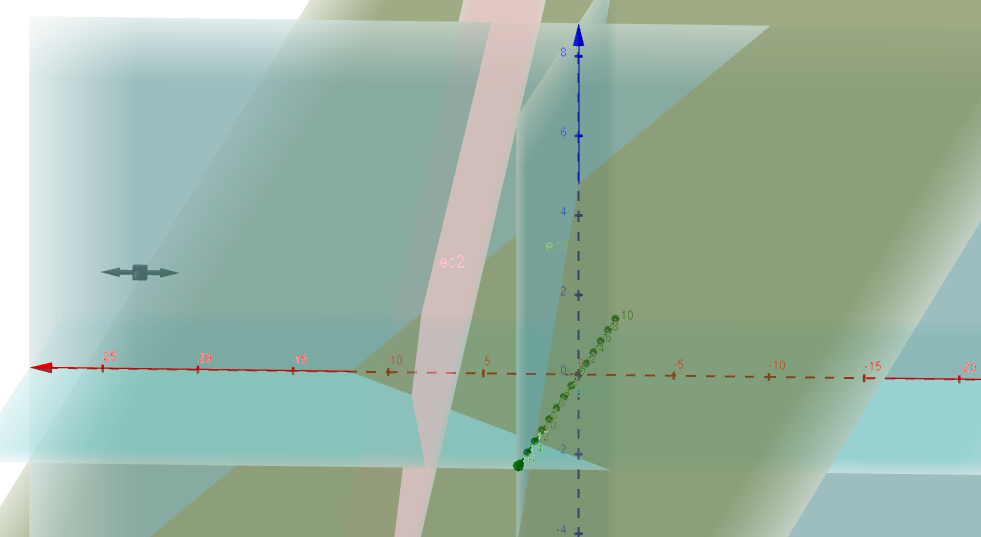

In [20]:
A = [[1, 1, 3],
     [2, 2, 5],
     [4, 1, 2]]
b = [30, 24, 36]
c = [3, 1, 2]
simplex(A, b, c)

x1: 8.0
x2: 4.0
x3: 0
x4: 18.0
x5: 0
x6: 0
z: 28.0


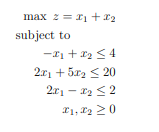

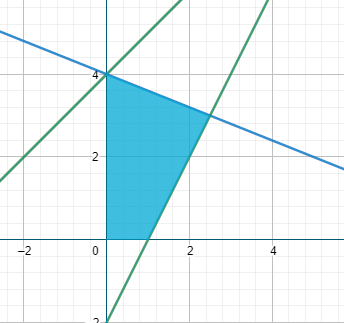

In [19]:
A = [[-1, 1],
     [2, 5],
     [2,-1]]
b = [4,20,2]
c = [1,1]
simplex(A, b, c)

x1: 2.5
x2: 3.0
x3: 3.5
x4: 0
x5: 0
z: 5.5


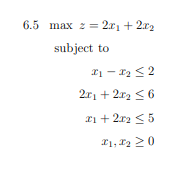

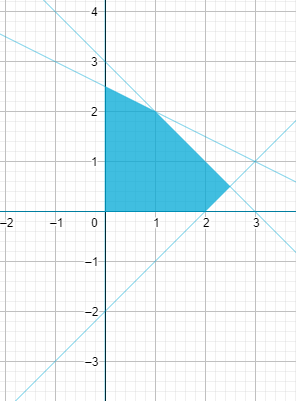

In [21]:
A = [[1, -1],
     [2, 2],
     [1, 2]]
b = [2,6,5]
c = [2,2]
simplex(A, b, c)

x1: 2.5
x2: 0.5
x3: 0
x4: 0
x5: 1.5
z: 6.0


## Conclusión
Para finalizar, pudimos observar que el algoritmo puede ser algo complejo de comprender, tanto la interpretación del enunciado, como la utilización del algoritmo como tal, sin embargo, es uno de los algoritmos más utilizados en las áreas de la matemática avanzada y la ciencia para minimizar y máximizar, debido a su gran eficiencia y resultados certeros, por lo cual es recomendable saber como funciona, ya que nos podría venir de utilidad en un futuro. Como lo podría ser en el área de economía, por si en algún dado caso, se desea invertir lo mínimo posible para alcanzar una meta o prblemas de la misma índole.

# Bibliografía

* Cormen, T., Leiserson, C., Rivest, Ronald & Stein, C. Secciones 29.1, 29.2 y 29.3 en Introduction to Algorithms, tercera edición (pp. 843-879). MIT Press.

* Shen, W. [wenshepsu] 11 may 2020. V3-29. Linear Programming. Convergence proof for Simplex method. Recuperado de: https://www.youtube.com/watch?v=IFCsUxW9aUs&t

* Shen, W. [wenshepsu] 11 may 2020: V3-30. Linear Programming. Convergence proof for Simplex method, Induction step.